# Circuiti 3

In [1966]:
import numpy as np
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.stats import chi2
import matplotlib.pyplot as plt
from uncertainties import ufloat
import uncertainties.umath as uu

### Circuito RC v1

In [1967]:
R = 66.8 * 10 ** (3) #ohm
C = 10 * 10 ** (-9) #farad

freq = 1 / (R*C*2*np.pi)
print(freq)

238.25590283217866


In [1968]:
data = np.loadtxt("Dati/RC_v1.txt") #media di 16 campionamenti

freq = []
Vin = [] #picco picco
Vout = []
Vin_out = []
phdiff = [] #phase difference

for i in range(len(data)):
    freq.append(data[i][0])
    Vin.append(data[i][1])
    Vout.append(data[i][2])
    Vin_out.append(data[i][3])
    phdiff.append(data[i][4] * np.pi / 180)

freq = np.array(freq)
Vin = np.array(Vin)
Vout = np.array(Vout)
Vin_out = np.array(Vin_out)
phdiff = np.array(phdiff)

In [1969]:
H = Vout / Vin

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


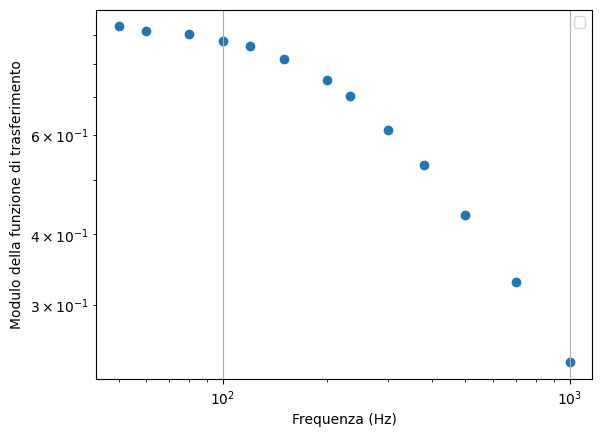

In [1970]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")
ax.set_yscale("log")

plt.scatter(freq, H)

plt.grid()
plt.legend()
plt.show()

In [1971]:
Z = np.sqrt(R**2 + 1/(2*np.pi*freq*C)**2)

In [1972]:
def model(x,a,b,c):
    return a / np.sqrt(b + c/(x**2))

V_err = 0.01 * Vin_out

minimi_quadrati = LeastSquares(freq, Vin_out, V_err, model)

m = Minuit(minimi_quadrati, a = 5, b = 0.001, c = 0)
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1144 (χ²/ndof = 114.4)     │              Nfcn = 145              │
│ EDM = 1.99e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.15    │   0.13    │            │            │         │         │       │
│ 1 │ b    │  0.0007   │  0.0011   │            │            │         │         │       │
│ 2 │ c    │    17     │    29     │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬──────────────────────────────────┐
│   │          a          b          c │
├───┼──────────────────────────────────┤
│ a │     0.0169   144.8e-6      3.769 │
│ b │   144.8e-6   1.24e-06 32.3648e-3 │
│ c │      3.769 32.3648e-3        843 │
└───┴──────────────────────────────────┘

p value: 0.0
10.0


C:\Users\tassi\AppData\Local\Temp\ipykernel_13564\2755110170.py:2: RuntimeWarning: divide by zero encountered in divide
  return a / np.sqrt(b + c/(x**2))
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


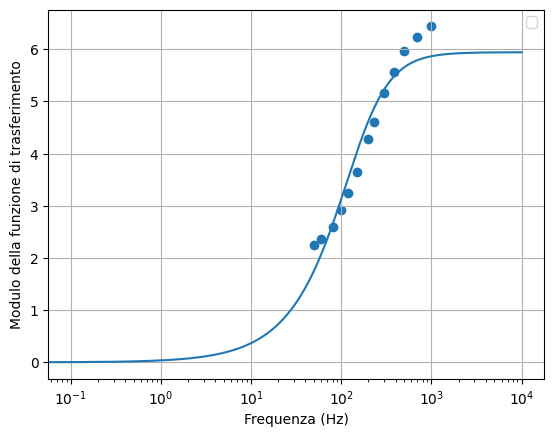

In [1973]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, Vin_out)
x = np.linspace(0,10000,100000)
y = model(x,m.values["a"],m.values["b"],m.values["c"])
plt.plot(x,y)

plt.grid()
plt.legend()
plt.show()

In [1974]:
H = Vin_out / Vin

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


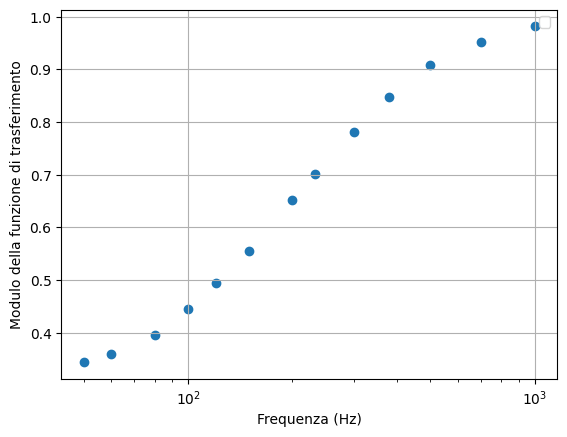

In [1975]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, H)

plt.grid()
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


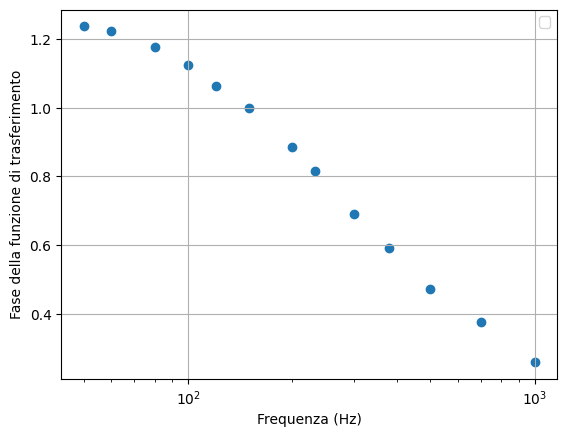

In [1976]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Fase della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, np.pi/2-phdiff)

plt.grid()
plt.legend()
plt.show()

### Circuito RC v2

In [1977]:
R = 266.6 #ohm
R_tot = R + 50 
C = 10 * 10 ** (-9) #farad

freq = 1 / (R_tot*C*2*np.pi)
print(freq)

50270.038879309956


In [1978]:
data = np.loadtxt("Dati/RC_v2.txt") #media di 16 campionamenti

freq = []
Vin = [] #picco picco
Vout = []
Vin_out = []
phdiff = [] #phase difference

for i in range(len(data)):
    freq.append(data[i][0] * 1000)
    Vin.append(data[i][1])
    Vout.append(data[i][2])
    Vin_out.append(data[i][3])
    phdiff.append(- data[i][4] * np.pi / 180)

freq = np.array(freq)
Vin = np.array(Vin)
Vout = np.array(Vout)
Vin_out = np.array(Vin_out)
phdiff = np.array(phdiff)

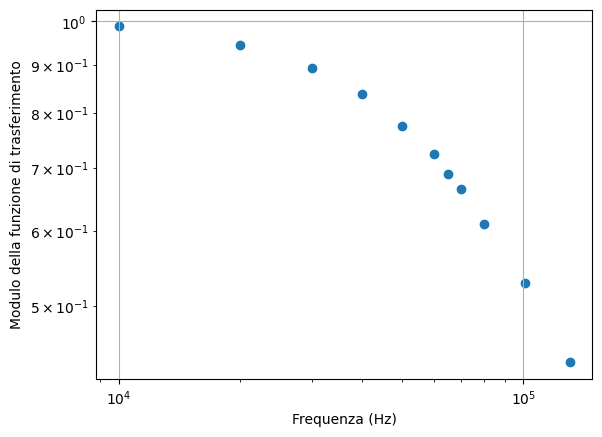

In [1979]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")
ax.set_yscale("log")

plt.scatter(freq, Vout/Vin)

plt.grid()
plt.show()

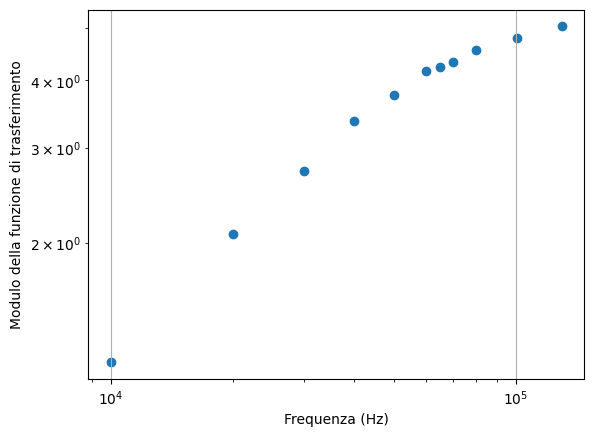

In [1980]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")
ax.set_yscale("log")

plt.scatter(freq, Vin_out)

plt.grid()
plt.show()

In [1981]:
def model(x,a,b,c):
    return a / np.sqrt(b + c/(x**2))

V_err = 0.04 * Vin_out

minimi_quadrati = LeastSquares(freq, Vin_out, V_err, model)

m = Minuit(minimi_quadrati, a = 1, b = 1, c = 1)
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

C:\Users\tassi\AppData\Local\Temp\ipykernel_13564\39420051.py:2: RuntimeWarning: invalid value encountered in sqrt
  return a / np.sqrt(b + c/(x**2))


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 6.048 (χ²/ndof = 0.8)      │              Nfcn = 163              │
│ EDM = 4.99e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   1.17    │   0.22    │            │            │         │         │       │
│ 1 │ b    │   0.051   │   0.019   │            │            │         │         │       │
│ 2 │ c    │  0.10e9   │  0.04e9   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────────────────┐
│   │             a             b             c │
├───┼───────────────────────────────────────────┤
│ a │        0.0471        4.1e-3  8.40681272e6 │
│ b │        4.1e-3       0.00036 719.2999666e3 │
│ c │  8.40681272e6 719.2999666e3      1.54e+15 │
└───┴───────────────────────────────────────────┘

p value: 0.6418208580849496
8.0


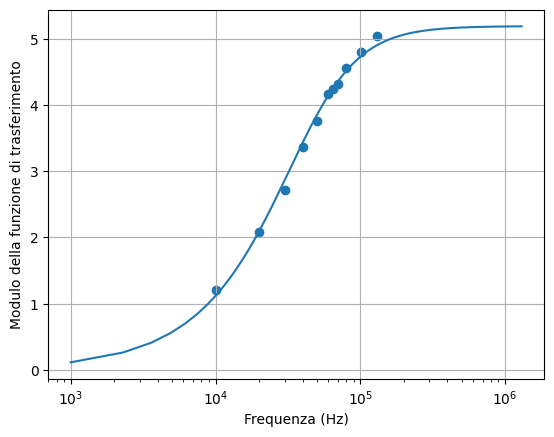

In [1982]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, Vin_out)
x = np.linspace(min(freq)/10,max(freq)*10,1000)
y = model(x,m.values["a"],m.values["b"],m.values["c"])
plt.plot(x,y)

plt.grid()
plt.show()

[ 1.72385989 -0.16487029 -1.31319065 -0.53996549 -0.5574453   0.12003999
 -0.20553508 -0.09501878  0.34087833  0.24769684  0.69240012]


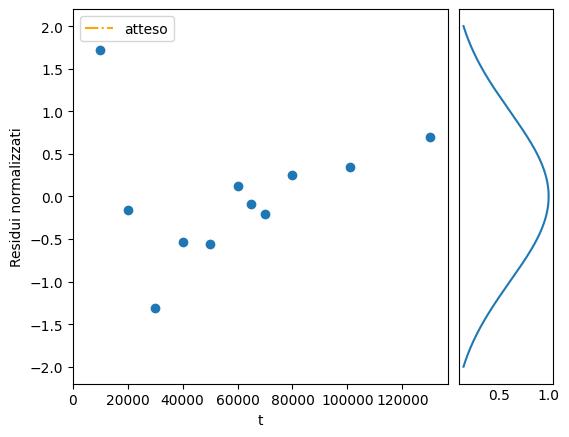

In [1983]:
def mostra_residui(freq, V, Verr, model, a, b, c):
    residuals = (V - model(freq,a,b,c))/Verr

    fig = plt.figure(figsize=(6, 6))

    gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        left=0.1, right=0.9, bottom=0.1, top=0.9,
                        wspace=0.05, hspace=0.05)

    ax = fig.add_subplot(gs[1, 0])
    ax_ploty = fig.add_subplot(gs[1, 1], sharey=ax)

    # weigthed mean of residuals

    ax.scatter(freq, residuals)
    ax.hlines(0,0,len(V),color='orange',linestyle='-.',label='atteso')
    ax.set_xlabel("t")
    ax.set_xlim(0, max(freq) * 1.05)
    ax.set_ylabel("Residui normalizzati")
    ax.legend(loc='upper left')
    ax.plot()

    x = np.linspace(-2, 2, 1000)
    ax_ploty.plot(np.exp(-0.5*(x)**2), x)
    ax_ploty.tick_params(labelleft=False, length=0)

    print(residuals)

mostra_residui(freq, Vin_out, V_err, model, m.values["a"], m.values["b"], m.values["c"])

### Circuito RL

In [1984]:
R = 266.6 #ohm
R_tot = R + 50 
L = 35 * 10 ** (-3) #farad

freq = R_tot / (L*2*np.pi)
print(freq)

1439.6701423684017


In [1985]:
data = np.loadtxt("Dati/RL.txt") #media di 16 campionamenti

freq = []
Vin = [] #picco picco
Vout = []
Vin_out = []
phdiff = [] #phase difference

for i in range(len(data)):
    freq.append(data[i][0] * 1000)
    Vin.append(data[i][1])
    Vout.append(data[i][2])
    Vin_out.append(data[i][3])
    phdiff.append(- data[i][4] * np.pi / 180)

freq = np.array(freq)
Vin = np.array(Vin)
Vout = np.array(Vout)
Vin_out = np.array(Vin_out)
phdiff = np.array(phdiff)

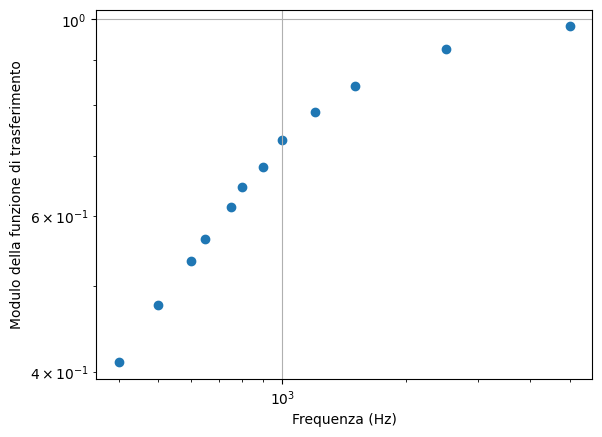

In [1986]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")
ax.set_yscale("log")

plt.scatter(freq, Vout/Vin)

plt.grid()
plt.show()

In [1987]:
def model(x,a,b,c):
    return a / np.sqrt(b + c*(x**2))

V_err = 0.02 * Vin_out

minimi_quadrati = LeastSquares(freq, Vin_out, V_err, model)

m = Minuit(minimi_quadrati, a = 10000, b = 10000000000, c = 10000)
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

C:\Users\tassi\AppData\Local\Temp\ipykernel_13564\3027399623.py:2: RuntimeWarning: invalid value encountered in sqrt
  return a / np.sqrt(b + c*(x**2))


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7.71 (χ²/ndof = 0.9)       │              Nfcn = 214              │
│ EDM = 4.44e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   0.5e6   │   1.5e6   │            │            │         │         │       │
│ 1 │ b    │  0.01e12  │  0.06e12  │            │            │         │         │       │
│ 2 │ c    │  0.01e6   │  0.04e6   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬────────────────────────────────────────┐
│   │            a            b            c │
├───┼────────────────────────────────────────┤
│ a │     2.18e+12   90.2665e15       58.5e9 │
│ b │   90.2665e15     3.74e+21 2.4247789e15 │
│ c │       58.5e9 2.4247789e15     1.57e+09 │
└───┴────────────────────────────────────────┘

p value: 0.5635959026818775
9.0


In [1988]:
fatt = np.sqrt(m.values["b"] / R_tot)
L = np.sqrt(m.values["c"])/fatt
print(L)

0.014330345095446465


### Circuito RLC

In [1989]:
L = 14 * 10 ** (-3)
C = 10 * 10 ** (-9)
R = 266.6 #ohm
R_tot = R + 50 

omega0 = 1/np.sqrt(L*C)
print(omega0/(2*np.pi))

13451.047731519027


In [1990]:
data = np.loadtxt("Dati/RLC.txt") #media di 16 campionamenti

freq = []
Vin = [] #picco picco
Vout = []
phdiff = [] #phase difference

if len(data.shape) == 1:
    data = data.reshape(-1, 4)  # Assuming 4 columns

freq = data[:, 0] * 1000
Vin = data[:, 1]
Vout = data[:, 2]
phdiff = data[:, 3] * np.pi / 180

freq = np.array(freq)
Vin = np.array(Vin)
Vout = np.array(Vout)
phdiff = np.array(phdiff)

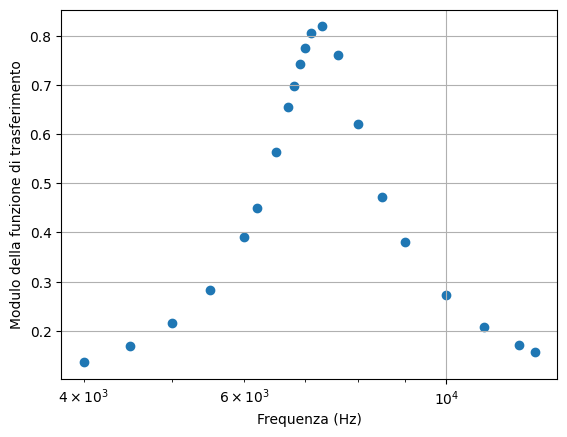

In [1991]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")
#ax.set_yscale("log")

plt.scatter(freq, Vout/Vin)

plt.grid()
plt.show()

In [1992]:
def model(x,a,b,c,d):
    return a / np.sqrt(b + (c*x - d/x)**2)

V_err = 0.02 * Vout

minimi_quadrati = LeastSquares(freq, Vout, V_err, model)

m = Minuit(minimi_quadrati, a = 10000, b = 10000000000, c = -60, d = -3000000000)
m.migrad()
m.hesse()
display(m)

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.ndof)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 9.688 (χ²/ndof = 0.6)      │              Nfcn = 284              │
│ EDM = 4.09e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  0.477e6  │  0.017e6  │            │            │         │         │       │
│ 1 │ b    │   9.2e9   │   0.7e9   │            │            │         │         │       │
│ 2 │ c    │   -55.9   │    2.0    │            │            │         │         │       │
│ 3 │ d    │  -2.98e9  │  0.11e9   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────────────────────────────────┐
│   │              a              b              c              d │
├───┼─────────────────────────────────────────────────────────────┤
│ a │       3.03e+08    11.87083e12      -34.531e3    -1.84455e12 │
│ b │    11.87083e12       4.91e+17 -1.335055623e9      -0.071e18 │
│ c │      -34.531e3 -1.335055623e9           4.09   217.621013e6 │
│ d │    -1.84455e12      -0.071e18   217.621013e6       1.17e+16 │
└───┴─────────────────────────────────────────────────────────────┘

p value: 0.9161662329628615
17.0


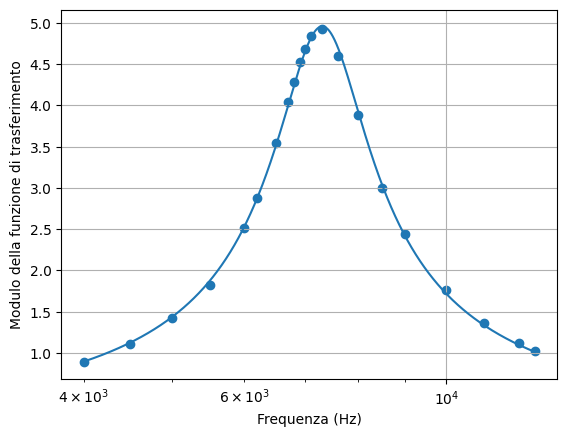

In [1993]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel("Frequenza (Hz)")
ax.set_ylabel("Modulo della funzione di trasferimento")
ax.set_xscale("log")

plt.scatter(freq, Vout)
x = np.linspace(min(freq),max(freq),10000)
y = model(x,m.values["a"],m.values["b"],m.values["c"],m.values["d"])
plt.plot(x,y)

plt.grid()
plt.show()